# Cross-Validation - Model Selection
## TASK 6: Model Selection - 5-Fold Cross-Validation

**Date:** December 30, 2025  
**Models:** Logistic Regression, Random Forest, XGBoost  
**Validation Method:** 5-Fold Stratified Cross-Validation  
**Purpose:** Robust model performance evaluation

---
## Setup

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')

✓ Libraries loaded


---
## Load Data

In [6]:
# Load full dataset (train + test combined for CV)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Combine for cross-validation
X_full = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_full = np.concatenate([y_train, y_test])

print('✓ Data loaded and combined')
print(f'Total samples: {len(X_full)}')
print(f'Total features: {X_full.shape[1]}')

✓ Data loaded and combined
Total samples: 1000
Total features: 24


---
## Define Models

In [7]:
# Initialize models with same parameters as baseline
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        #multi_class='ovr',
        solver='lbfgs'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='multi:softprob',
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'
    )
}

print('✓ Models initialized:')
for name in models.keys():
    print(f'  • {name}')

✓ Models initialized:
  • Logistic Regression
  • Random Forest
  • XGBoost


---
## Setup Cross-Validation

In [8]:
# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0)
}

print('✓ Cross-validation setup:')
print(f'  • Method: Stratified K-Fold')
print(f'  • Number of folds: 5')
print(f'  • Shuffle: Yes')
print(f'  • Random state: 42')
print(f'  • Metrics: Accuracy, Precision, Recall, F1-Score')

✓ Cross-validation setup:
  • Method: Stratified K-Fold
  • Number of folds: 5
  • Shuffle: Yes
  • Random state: 42
  • Metrics: Accuracy, Precision, Recall, F1-Score


---
## Perform Cross-Validation

In [9]:
# Perform cross-validation for each model
cv_results = {}

print('='*80)
print('RUNNING 5-FOLD CROSS-VALIDATION')
print('='*80)

for model_name, model in models.items():
    print(f'\n{model_name}...')
    
    # Special handling for Logistic Regression (needs scaling)
    if model_name == 'Logistic Regression':
        from sklearn.pipeline import Pipeline
        model_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        scores = cross_validate(model_pipeline, X_full, y_full, 
                               cv=cv, scoring=scoring, n_jobs=-1)
    else:
        scores = cross_validate(model, X_full, y_full, 
                               cv=cv, scoring=scoring, n_jobs=-1)
    
    cv_results[model_name] = scores
    print(f'  ✓ Completed 5 folds')

print('\n✓ Cross-validation completed for all models')

RUNNING 5-FOLD CROSS-VALIDATION

Logistic Regression...
  ✓ Completed 5 folds

Random Forest...
  ✓ Completed 5 folds

XGBoost...
  ✓ Completed 5 folds

✓ Cross-validation completed for all models


---
## Results Summary

In [10]:
# Create results DataFrame
results_data = []

for model_name, scores in cv_results.items():
    results_data.append({
        'Model': model_name,
        'Accuracy_Mean': scores['test_accuracy'].mean(),
        'Accuracy_Std': scores['test_accuracy'].std(),
        'Precision_Mean': scores['test_precision'].mean(),
        'Precision_Std': scores['test_precision'].std(),
        'Recall_Mean': scores['test_recall'].mean(),
        'Recall_Std': scores['test_recall'].std(),
        'F1_Mean': scores['test_f1'].mean(),
        'F1_Std': scores['test_f1'].std()
    })

cv_df = pd.DataFrame(results_data)

print('='*80)
print('CROSS-VALIDATION RESULTS (5-FOLD)')
print('='*80)
print('\nFormat: Mean ± Std')
print('-'*80)

for idx, row in cv_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  Accuracy:  {row['Accuracy_Mean']:.4f} ± {row['Accuracy_Std']:.4f}")
    print(f"  Precision: {row['Precision_Mean']:.4f} ± {row['Precision_Std']:.4f}")
    print(f"  Recall:    {row['Recall_Mean']:.4f} ± {row['Recall_Std']:.4f}")
    print(f"  F1-Score:  {row['F1_Mean']:.4f} ± {row['F1_Std']:.4f}")

CROSS-VALIDATION RESULTS (5-FOLD)

Format: Mean ± Std
--------------------------------------------------------------------------------

Logistic Regression:
  Accuracy:  0.9550 ± 0.0084
  Precision: 0.9512 ± 0.0066
  Recall:    0.9528 ± 0.0088
  F1-Score:  0.9516 ± 0.0071

Random Forest:
  Accuracy:  0.9960 ± 0.0020
  Precision: 0.9952 ± 0.0025
  Recall:    0.9942 ± 0.0030
  F1-Score:  0.9947 ± 0.0027

XGBoost:
  Accuracy:  0.9970 ± 0.0024
  Precision: 0.9971 ± 0.0025
  Recall:    0.9975 ± 0.0022
  F1-Score:  0.9973 ± 0.0022


In [11]:
# Identify best model
best_model_idx = cv_df['Accuracy_Mean'].idxmax()
best_model_name = cv_df.loc[best_model_idx, 'Model']
best_accuracy = cv_df.loc[best_model_idx, 'Accuracy_Mean']
best_accuracy_std = cv_df.loc[best_model_idx, 'Accuracy_Std']

print('\n' + '='*80)
print(f'🏆 BEST MODEL: {best_model_name}')
print(f'   Accuracy: {best_accuracy:.4f} ± {best_accuracy_std:.4f}')
print('='*80)


🏆 BEST MODEL: XGBoost
   Accuracy: 0.9970 ± 0.0024


---
## Detailed Fold-by-Fold Results

In [12]:
# Show individual fold scores
print('\n' + '='*80)
print('FOLD-BY-FOLD ACCURACY SCORES')
print('='*80)

fold_data = []

for model_name, scores in cv_results.items():
    print(f'\n{model_name}:')
    for i, acc in enumerate(scores['test_accuracy'], 1):
        print(f'  Fold {i}: {acc:.4f}')
        fold_data.append({
            'Model': model_name,
            'Fold': i,
            'Accuracy': acc
        })
    print(f'  Mean:   {scores["test_accuracy"].mean():.4f}')
    print(f'  Std:    {scores["test_accuracy"].std():.4f}')

fold_df = pd.DataFrame(fold_data)


FOLD-BY-FOLD ACCURACY SCORES

Logistic Regression:
  Fold 1: 0.9600
  Fold 2: 0.9450
  Fold 3: 0.9450
  Fold 4: 0.9600
  Fold 5: 0.9650
  Mean:   0.9550
  Std:    0.0084

Random Forest:
  Fold 1: 0.9950
  Fold 2: 0.9950
  Fold 3: 0.9950
  Fold 4: 0.9950
  Fold 5: 1.0000
  Mean:   0.9960
  Std:    0.0020

XGBoost:
  Fold 1: 0.9950
  Fold 2: 1.0000
  Fold 3: 0.9950
  Fold 4: 1.0000
  Fold 5: 0.9950
  Mean:   0.9970
  Std:    0.0024


---
## Visualize Results

✓ Saved: cross_validation_boxplots.png


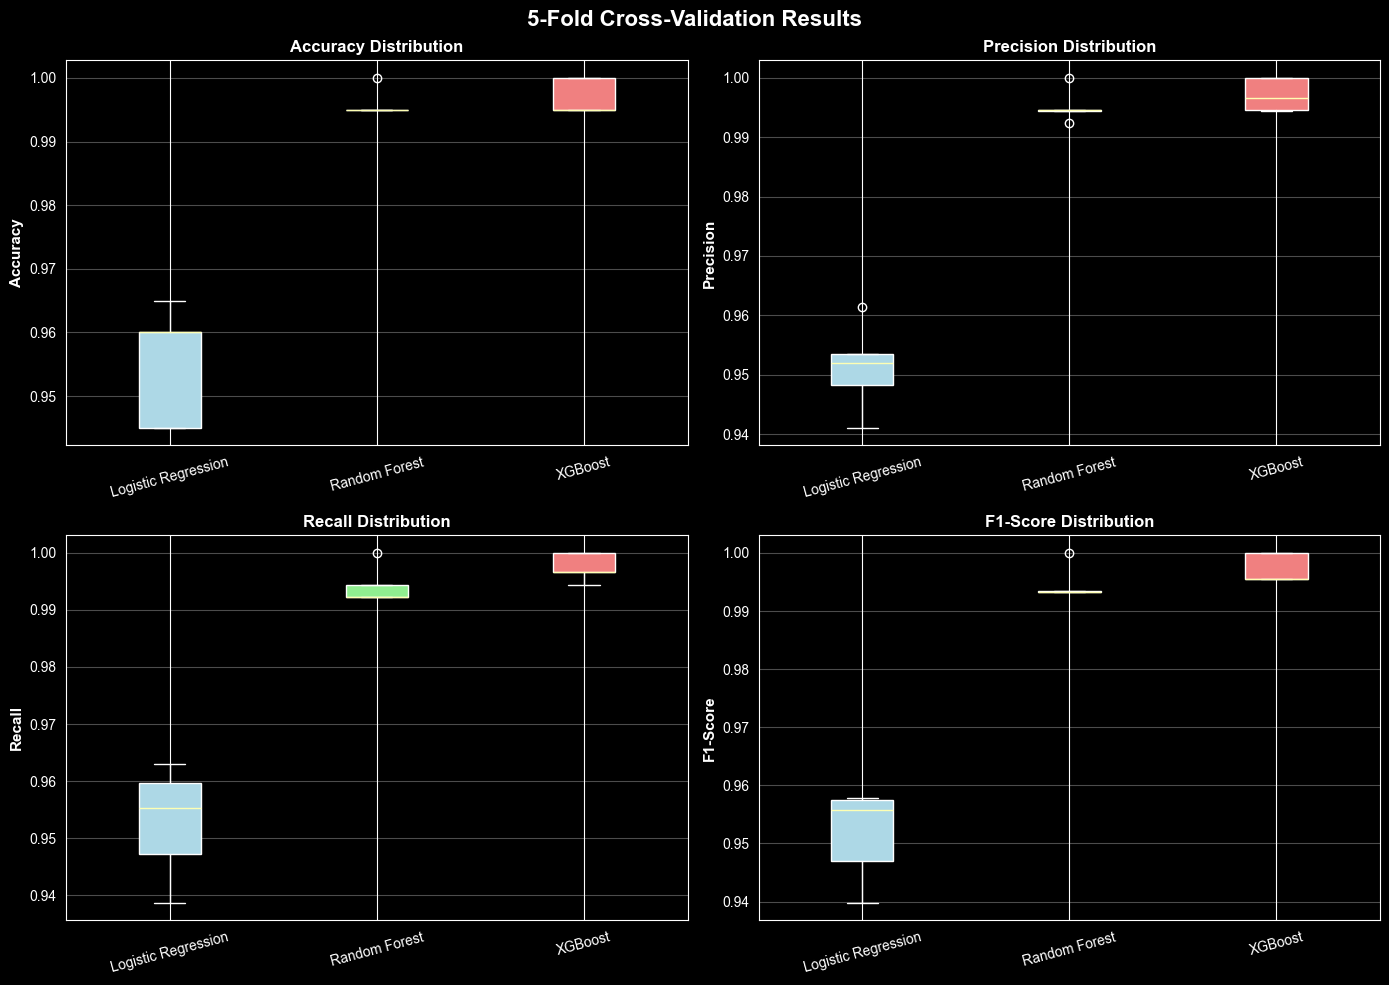

In [13]:
# Box plot of cross-validation scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('5-Fold Cross-Validation Results', fontsize=16, fontweight='bold')

metrics = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    data_to_plot = [cv_results[model][f'test_{metric}'] for model in models.keys()]
    
    bp = ax.boxplot(data_to_plot, labels=list(models.keys()), patch_artist=True)
    
    # Color boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(title, fontsize=11, fontweight='bold')
    ax.set_title(f'{title} Distribution', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('cross_validation_boxplots.png', dpi=300, bbox_inches='tight')
print('✓ Saved: cross_validation_boxplots.png')
plt.show()

✓ Saved: cross_validation_comparison.png


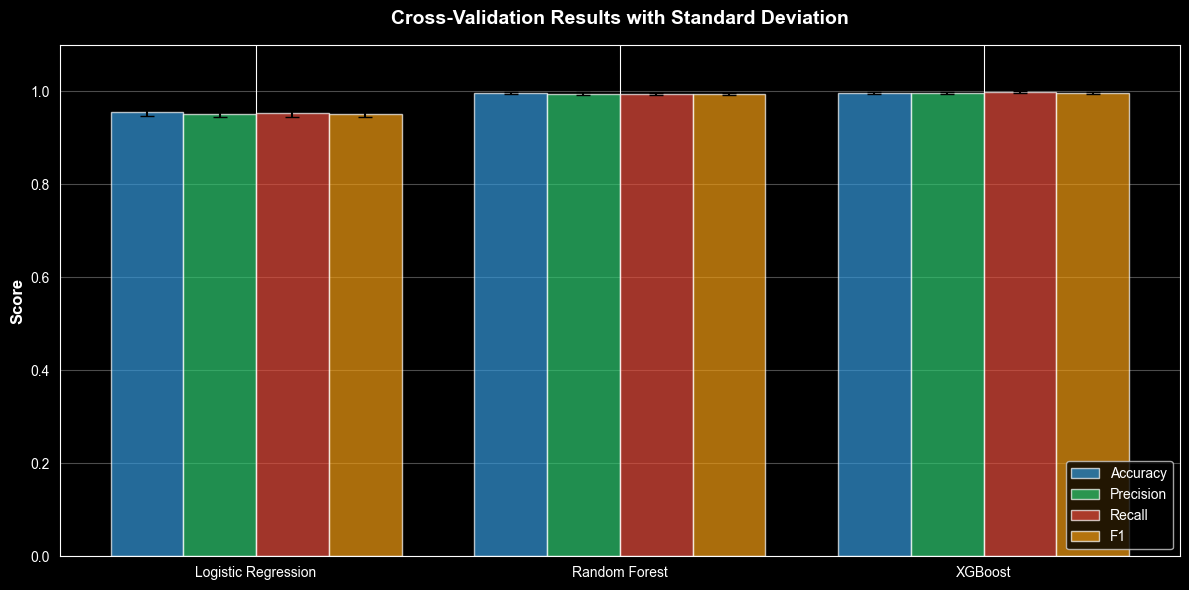

In [14]:
# Bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.2

metrics_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for i, (metric, color) in enumerate(zip(metrics_plot, colors)):
    means = cv_df[f'{metric}_Mean'].values
    stds = cv_df[f'{metric}_Std'].values
    
    ax.bar(x + i*width, means, width, label=metric, 
          yerr=stds, capsize=5, alpha=0.7, color=color)

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Cross-Validation Results with Standard Deviation', 
            fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(cv_df['Model'].values)
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3, axis='y')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('cross_validation_comparison.png', dpi=300, bbox_inches='tight')
print('✓ Saved: cross_validation_comparison.png')
plt.show()

✓ Saved: cross_validation_folds.png


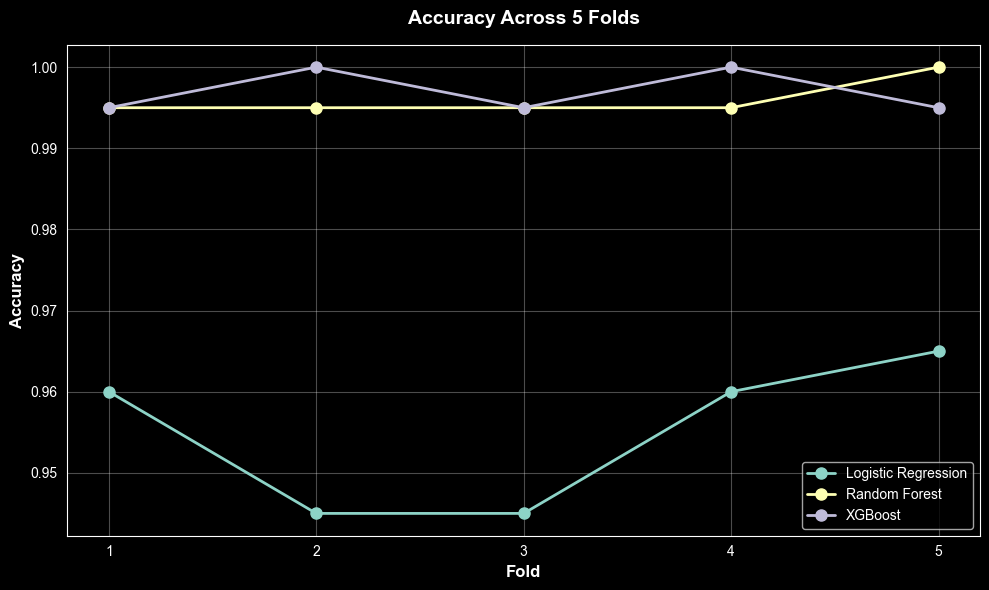

In [15]:
# Fold-by-fold line plot
plt.figure(figsize=(10, 6))

for model_name in models.keys():
    model_data = fold_df[fold_df['Model'] == model_name]
    plt.plot(model_data['Fold'], model_data['Accuracy'], 
            marker='o', linewidth=2, markersize=8, label=model_name)

plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy Across 5 Folds', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.savefig('cross_validation_folds.png', dpi=300, bbox_inches='tight')
print('✓ Saved: cross_validation_folds.png')
plt.show()

---
## Statistical Analysis

In [16]:
# Calculate confidence intervals (95%)
from scipy import stats

print('\n' + '='*80)
print('95% CONFIDENCE INTERVALS')
print('='*80)

for model_name, scores in cv_results.items():
    accuracy_scores = scores['test_accuracy']
    mean = accuracy_scores.mean()
    std_error = stats.sem(accuracy_scores)
    confidence_interval = stats.t.interval(0.95, len(accuracy_scores)-1, 
                                          loc=mean, scale=std_error)
    
    print(f'\n{model_name}:')
    print(f'  Mean Accuracy: {mean:.4f}')
    print(f'  95% CI: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]')
    print(f'  Range: ±{(confidence_interval[1] - mean):.4f}')


95% CONFIDENCE INTERVALS

Logistic Regression:
  Mean Accuracy: 0.9550
  95% CI: [0.9434, 0.9666]
  Range: ±0.0116

Random Forest:
  Mean Accuracy: 0.9960
  95% CI: [0.9932, 0.9988]
  Range: ±0.0028

XGBoost:
  Mean Accuracy: 0.9970
  95% CI: [0.9936, 1.0004]
  Range: ±0.0034


---
## Save Results

In [17]:
# Save cross-validation results
cv_df.to_csv('cross_validation_results.csv', index=False)
print('✓ Saved: cross_validation_results.csv')

# Save fold-by-fold results
fold_df.to_csv('cross_validation_folds.csv', index=False)
print('✓ Saved: cross_validation_folds.csv')

# Save detailed results
detailed_results = []
for model_name, scores in cv_results.items():
    for fold in range(5):
        detailed_results.append({
            'Model': model_name,
            'Fold': fold + 1,
            'Accuracy': scores['test_accuracy'][fold],
            'Precision': scores['test_precision'][fold],
            'Recall': scores['test_recall'][fold],
            'F1_Score': scores['test_f1'][fold]
        })

detailed_df = pd.DataFrame(detailed_results)
detailed_df.to_csv('cross_validation_detailed.csv', index=False)
print('✓ Saved: cross_validation_detailed.csv')

✓ Saved: cross_validation_results.csv
✓ Saved: cross_validation_folds.csv
✓ Saved: cross_validation_detailed.csv


---
## Summary & Recommendations

In [18]:
print('\n' + '='*80)
print('CROSS-VALIDATION SUMMARY & RECOMMENDATIONS')
print('='*80)

print(f'\n1. Best Performing Model: {best_model_name}')
print(f'   Mean Accuracy: {best_accuracy:.4f} ± {best_accuracy_std:.4f}')

# Model stability analysis
print('\n2. Model Stability (based on std deviation):')
sorted_by_std = cv_df.sort_values('Accuracy_Std')
for idx, row in sorted_by_std.iterrows():
    stability = 'High' if row['Accuracy_Std'] < 0.02 else 'Medium' if row['Accuracy_Std'] < 0.05 else 'Low'
    print(f"   {row['Model']}: {stability} (std: {row['Accuracy_Std']:.4f})")

# Performance difference
print('\n3. Performance Differences:')
max_acc = cv_df['Accuracy_Mean'].max()
min_acc = cv_df['Accuracy_Mean'].min()
print(f'   Best to Worst: {(max_acc - min_acc)*100:.2f}% accuracy difference')

print('\n4. Recommendations:')
if best_accuracy_std < 0.02:
    print(f'   ✓ {best_model_name} shows excellent stability')
    print('   → Recommended for deployment')
elif best_accuracy_std < 0.05:
    print(f'   ✓ {best_model_name} shows good stability')
    print('   → Suitable for deployment with monitoring')
else:
    print(f'   ⚠ {best_model_name} shows high variance')
    print('   → Consider hyperparameter tuning or ensemble methods')

if max_acc > 0.90:
    print('\n   ✓ Excellent performance achieved (>90% accuracy)')
elif max_acc > 0.80:
    print('\n   ✓ Good performance (80-90% accuracy)')
    print('   → Consider hyperparameter optimization')
else:
    print('\n   ⚠ Performance needs improvement')
    print('   → Consider advanced feature engineering or ensemble methods')

print('\n5. Next Steps:')
print(f'   1. Hyperparameter tuning for {best_model_name}')
print('   2. Test on final holdout set')
print('   3. Analyze misclassifications')
print('   4. Consider ensemble methods if needed')

print('\n' + '='*80)


CROSS-VALIDATION SUMMARY & RECOMMENDATIONS

1. Best Performing Model: XGBoost
   Mean Accuracy: 0.9970 ± 0.0024

2. Model Stability (based on std deviation):
   Random Forest: High (std: 0.0020)
   XGBoost: High (std: 0.0024)
   Logistic Regression: High (std: 0.0084)

3. Performance Differences:
   Best to Worst: 4.20% accuracy difference

4. Recommendations:
   ✓ XGBoost shows excellent stability
   → Recommended for deployment

   ✓ Excellent performance achieved (>90% accuracy)

5. Next Steps:
   1. Hyperparameter tuning for XGBoost
   2. Test on final holdout set
   3. Analyze misclassifications
   4. Consider ensemble methods if needed



---
## Summary

### Cross-Validation Benefits:
- **Robust evaluation:** Uses all data for both training and testing
- **Reduces variance:** Average across 5 folds provides stable estimate
- **Detects overfitting:** High variance indicates model instability
- **Fair comparison:** All models evaluated on same folds

### Stratified K-Fold:
- Maintains class distribution in each fold
- Important for imbalanced datasets
- Ensures each fold is representative

### Files Generated:
- cross_validation_results.csv (summary)
- cross_validation_folds.csv (fold-by-fold)
- cross_validation_detailed.csv (all metrics)
- cross_validation_boxplots.png
- cross_validation_comparison.png
- cross_validation_folds.png

### Key Metrics:
- **Mean:** Average performance across folds
- **Std:** Consistency/stability of performance
- **95% CI:** Range where true performance likely lies

---
**Cross-Validation Complete!**